In [6]:
import pandas as pd
from scipy.stats import ttest_ind

member_data = pd.read_csv("members.csv")

inactive_data = member_data.query("status == 'inactive'")
inactive_data['start_date'] = pd.to_datetime(inactive_data['visitDate'])
inactive_data['end_date'] = pd.to_datetime(inactive_data['endDate'])

inactive_data['months_active'] = ((inactive_data['end_date'] - inactive_data['start_date']) / pd.Timedelta(days=30)).astype(int)

male_members = inactive_data[inactive_data['gender'] == 'M']['months_active']
female_members = inactive_data[inactive_data['gender'] == 'F']['months_active']

test_statistics, significance_value = ttest_ind(male_members, female_members)

print("t-test results:")
print('T-Stats:', test_statistics)
print('P-Value:', significance_value)

t-test results:
T-Stats: -3.6141765606455802
P-Value: 0.0003222545643733536


/var/folders/99/8w5jn6md7lz79sb1_jx_1v080000gn/T/ipykernel_5341/3473582963.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inactive_data['start_date'] = pd.to_datetime(inactive_data['visitDate'])
/var/folders/99/8w5jn6md7lz79sb1_jx_1v080000gn/T/ipykernel_5341/3473582963.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inactive_data['end_date'] = pd.to_datetime(inactive_data['endDate'])
/var/folders/99/8w5jn6md7lz79sb1_jx_1v080000gn/T/ipykernel_5341/3473582963.py:10: SettingWithCopyWarning: 
A value i

         Date    Open    High     Low   Close  AdjustedClose     Volume  \
0  2017-01-03  57.900  58.165  57.380  58.075         54.595  230255200   
1  2017-01-04  57.925  58.255  57.875  58.010         54.534  168944800   
2  2017-01-05  57.960  58.430  57.905  58.305         54.812  177548800   
3  2017-01-06  58.390  59.080  58.235  58.955         55.423  254015200   
4  2017-01-09  58.975  59.715  58.970  59.495         55.930  268495200   

   daily_returns  
0            NaN  
1      -0.001117  
2       0.005098  
3       0.011147  
4       0.009148  


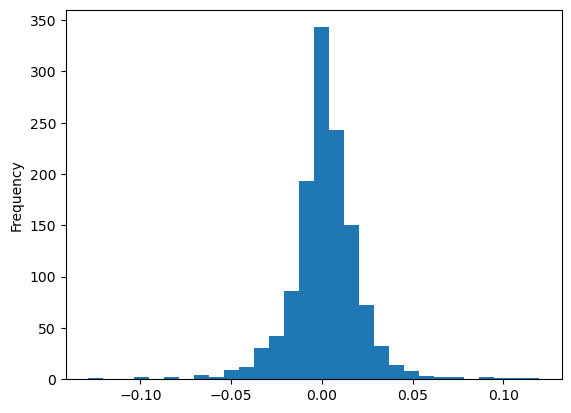

Skewness: -0.1
Kurtosis: 6.65
Skewness test p-value: 0.1429
Kurtosis test p-value: 0.0
Standard Deviation: 0.019
Outliers:
           Date     Open     High      Low    Close  AdjustedClose     Volume  \
20   2017-02-01   63.515   65.245   63.505   64.375         60.518  895880000   
397  2018-08-01   99.565  100.880   98.655  100.750         97.002  543485600   
463  2018-11-02  104.775  106.825  102.715  103.740        100.231  730629600   
498  2018-12-26   74.150   78.615   73.360   78.585         76.191  468660000   
503  2019-01-03   71.990   72.860   71.000   71.095         68.930  730497600   
521  2019-01-30   81.625   83.075   80.115   82.625         80.108  488878400   
592  2019-05-13   93.855   94.740   91.425   92.860         90.766  459444800   
792  2020-02-27  140.550  143.000  136.480  136.760        134.906  641211200   
794  2020-03-02  141.140  150.720  138.860  149.405        147.380  682794400   
799  2020-03-09  131.875  139.045  131.500  133.085        131.281 

In [8]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

stock_data = pd.read_csv("ORNG1.csv")

stock_data['daily_returns'] = stock_data['AdjustedClose'].pct_change()
print(stock_data.head())

stock_data['daily_returns'].plot(kind='hist', bins=30)
plt.show()

skewness = round(stock_data['daily_returns'].skew(), 2)
kurtosis = round(stock_data['daily_returns'].kurt(), 2)
print("Skewness:", skewness)
print("Kurtosis:", kurtosis)

skew_test_result = round(stats.skewtest(stock_data['daily_returns'].dropna()).pvalue, 4)
kurtosis_test_result = round(stats.kurtosistest(stock_data['daily_returns'].dropna()).pvalue, 4)
print("Skewness test p-value:", skew_test_result)
print("Kurtosis test p-value:", kurtosis_test_result)

standard_deviation = round(stock_data['daily_returns'].std(), 3)
print("Standard Deviation:", standard_deviation)

outliers = stock_data[(stock_data['daily_returns'] < (-3 * standard_deviation)) | 
                      (stock_data['daily_returns'] > (3 * standard_deviation))]
print("Outliers:")
print(outliers)
